## 6월 25일, 몬테카를로 시뮬레이션

In [1]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import scipy.stats as stats

In [2]:
import glob

In [3]:
pd.__version__

'0.25.3'

---

## # 데이터 준비 : 전체 

In [ ]:
# 전체
data_order = pd.read_csv('../simulation_data/data_order_0606_simulation.csv')

# action_user
user_0606 = pd.read_csv('../simulation_data/user_0606_simulation.csv')

In [43]:
data_order.nunique() # 

pay_dt               1440
fullvisitorID      119813
transactionID      161124
productSKU          54859
lastTestCode            3
pay_theme_id         1240
searchYn                2
search_dt            2226
location                3
searchTestCode          3
search_prod         33534
search_theme_id      1189
orderYn                 1
biz_dt              66775
purchase_no        161124
order_no           210537
prod_no             54859
order_price          7009
prod_qty              115
cmYn                    1
cm2                 18959
dtype: int64

---

## 전체(검색+비검색) , 상품권 포함

## # simulation (loop)

In [635]:
data_order.shape

(210537, 21)

In [632]:
data_order.lastTestCode.unique() # type - lastTestCode 활용

array(['A', 'C', 'B'], dtype=object)

In [10]:
data_order.columns

Index(['Unnamed: 0', 'pay_dt', 'fullvisitorID', 'transactionID', 'productSKU',
       'lastTestCode', 'pay_theme_id', 'searchYn', 'search_dt', 'location',
       'searchTestCode', 'search_prod', 'search_theme_id', 'orderYn', 'biz_dt',
       'purchase_no', 'order_no', 'prod_no', 'order_price', 'prod_qty'],
      dtype='object')

In [633]:
data_order[data_order.lastTestCode.isnull()]

,pay_dt,fullvisitorID,transactionID,productSKU,lastTestCode,pay_theme_id,searchYn,search_dt,location,searchTestCode,...,search_theme_id,orderYn,biz_dt,purchase_no,order_no,prod_no,order_price,prod_qty,cmYn,cm2


In [634]:
data_order.head(2)

,pay_dt,fullvisitorID,transactionID,productSKU,lastTestCode,pay_theme_id,searchYn,search_dt,location,searchTestCode,...,search_theme_id,orderYn,biz_dt,purchase_no,order_no,prod_no,order_price,prod_qty,cmYn,cm2
4976,2019-06-06 12:03:00,10237449757507232164,727554206,1223304,A,240030601.0,N,NaN,NaN,NaN,...,NaN,Y,2019-06-06 12:06:49,727554206.0,895613595.0,1223304.0,10900.0,1.0,Y,1421.0
4977,2019-06-06 18:09:00,11452331670875574201,727615615,1223304,A,240030601.0,N,NaN,NaN,NaN,...,NaN,Y,2019-06-06 18:09:47,727615615.0,895681051.0,1223304.0,25300.0,3.0,Y,3451.0


In [636]:
data_order.cmYn.unique()

array(['Y'], dtype=object)

----

In [637]:
## data 명시
data_input = data_order.copy()
action_user = user_0606.copy()
#####

sub_a_ = []
#sub_a = []
sub_a_cm_ = [] # 구매 있는것만 채운 cm
#sub_a_cm = [] # 0으로 채운 10000개의 cm
#sub_a_ratio = []
#sub_a_index = []

sub_b_ = []
#sub_b = []
sub_b_cm_ = [] # 구매 있는것만 채운 cm
#sub_b_cm = [] # 0으로 채운 10000개의 cm
#sub_b_ratio = []
#sub_b_index = []

sub_c_ = []
#sub_c = []
sub_c_cm_ = [] # 구매 있는것만 채운 cm
#sub_c_cm = [] # 0으로 채운 10000개의 cm
#sub_c_ratio = []
#sub_c_index = []

num_simulations = 10000
num_sampling  = 10000

for type_ in data_input.lastTestCode.unique():  # 광고 type별로 진행
    
    if type_ == 'A':
        for i in range(num_simulations) :             ### index도 따로 저장해주는게 나을뻔했나?
            actionuser_a = action_user[ action_user.testcode == type_].sample(n = num_sampling).fullvisitorid
            sample_a = data_input[ data_input.fullvisitorID.isin(actionuser_a) ].copy()
            
            # 1.price
            a_price = sample_a.groupby('fullvisitorID')['order_price'].sum().tolist()
            sub_a_.append( a_price )
            
            #a_price_fin = np.append(np.zeros(10000-len(a_price)), np.array(a_price))
            #sub_a.append( a_price_fin ) # user의 order-sum 저장
            
            # 2.cm
            a_cm = sample_a.groupby('fullvisitorID')['cm2'].sum().tolist()
            sub_a_cm_.append( a_cm )
            
            #a_cm_fin = np.append(np.zeros(10000-len(a_cm)), np.array(a_cm))
            #sub_a_cm.append( a_cm_fin ) 
            
            #sub_a_ratio.append( sample_a[sample_a.searchYn == 'Y'].shape[0] / sample_a.shape[0] ) # 검색구매 Ratio
            #sub_a_index.append( sample_a.index.tolist() )# sample의 index 저장
    
    if type_ == 'B':
        for i in range(num_simulations) : 
            actionuser_b = action_user[ action_user.testcode == type_].sample(n = num_sampling).fullvisitorid
            sample_b = data_input[ data_input.fullvisitorID.isin(actionuser_b) ].copy()
            
            # 1.price
            b_price = sample_b.groupby('fullvisitorID')['order_price'].sum().tolist()
            sub_b_.append( b_price )
            
            #b_price_fin = np.append(np.zeros(10000-len(b_price)), np.array(b_price))
            #sub_b.append( b_price_fin ) # user의 order-sum 저장
            
            # 2.cm
            b_cm = sample_b.groupby('fullvisitorID')['cm2'].sum().tolist()
            sub_b_cm_.append( b_cm )
            
            #b_cm_fin = np.append(np.zeros(10000-len(b_cm)), np.array(b_cm))
            #sub_b_cm.append( b_cm_fin ) 
            #sub_b_ratio.append( sample_b[sample_b.searchYn == 'Y'].shape[0] / sample_b.shape[0] ) # 검색구매 Ratio
            #sub_b_index.append( sample_b.index.tolist() )# sample의 index 저장
            
    
    if type_ == 'C':
        for i in range(num_simulations) : 
            actionuser_c = action_user[ action_user.testcode == type_].sample(n = num_sampling).fullvisitorid
            sample_c = data_input[ data_input.fullvisitorID.isin(actionuser_c) ].copy()
            
            # 1.price
            c_price = sample_c.groupby('fullvisitorID')['order_price'].sum().tolist()
            sub_c_.append( c_price )
            
            #c_price_fin = np.append(np.zeros(10000-len(c_price)), np.array(c_price))
            #sub_c.append( c_price_fin ) # user의 order-sum 저장
            
            # 2.cm
            c_cm = sample_c.groupby('fullvisitorID')['cm2'].sum().tolist()
            sub_c_cm_.append( c_cm )
            
            #c_cm_fin = np.append(np.zeros(10000-len(c_cm)), np.array(c_cm))
            #sub_c_cm.append( c_cm_fin ) 
            #sub_c_ratio.append( sample_c[sample_c.searchYn == 'Y'].shape[0] / sample_c.shape[0] ) # 검색구매 Ratio
            #sub_c_index.append( sample_c.index.tolist() )# sample의 index 저장

       
       

In [638]:
ll = 0
for i in range(len(sub_a_)):
    ll += len(sub_a_[i])

print(ll/len(sub_a_))
    

814.4208


In [639]:
ll = 0
for i in range(len(sub_a_cm_)):
    ll += len(sub_a_cm_[i])

print(ll/len(sub_a_cm_))
    

814.4208


In [640]:
len(b_price)

895

In [641]:
ll = 0
for i in range(len(sub_b_)):
    ll += len(sub_b_[i])

print(ll/len(sub_b_))

835.075


In [642]:
len(c_price)

849

In [643]:
ll = 0
for i in range(len(sub_c_)):
    ll += len(sub_c_[i])

print(ll/len(sub_c_))

841.9028


---

# 3.1.1 전체 관점 - A / B

### # 3.1.1-(1) conversion

In [644]:
ss = 0
t_stat = []

for i in range(len(sub_a_)):
    # equal variance test
    #var_test = stats.levene(sub_a_notgc[i], sub_b_notgc[i]) # 등분산이라고 가정하고
    
    t1 = np.append(np.zeros(10000-len(sub_a_[i])), np.array( sub_a_[i] ))
    t2 = np.append(np.zeros(10000-len(sub_b_[i])), np.array( sub_b_[i] ))
    
    test_result = stats.ttest_ind( t1, t2, equal_var=True)
    t_stat.append(test_result[0])
    if test_result[1] < 0.1 : 
        ss += 1

In [645]:
1-ss/10000

0.915

- 우리가 얻은 통계량과, 표준정규분포와 비교(t분포지만, sample size 크기때문에 수렴!)

In [646]:
s1 = np.random.normal(0, 1, 10000)

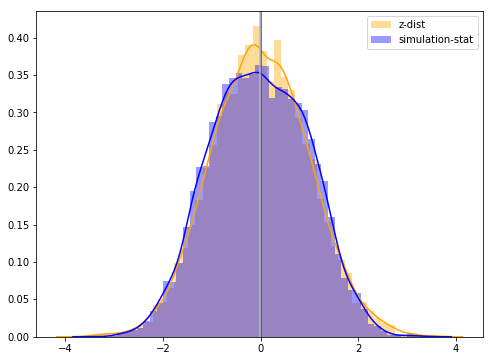

In [647]:
plt.figure(figsize = (8,6))

sns.distplot( s1 , bins = 50, color='orange', label = 'z-dist')
sns.distplot(t_stat, bins = 50, color = 'blue', label= 'simulation-stat')


plt.axvline(x=0, color = 'red')
plt.axvline(x=np.array(t_stat).mean(), color = 'skyblue')

plt.legend()
plt.show()
plt.close()

In [648]:
# A가 더 큰 통계량 개수 - 4892개(10000개 중)
sum(np.array(t_stat)>0)/10000

0.4891

---

---

### # 3.1.1-(2)  ARPPU : Purchase customer's average 

In [654]:
ss = 0
t_stat = []

for i in range(len(sub_a_)):
    # equal variance test
    #var_test = stats.levene(sub_a_notgc[i], sub_b_notgc[i]) # 동분산이라고 가정하고
    
    test_result = stats.ttest_ind(sub_a_[i], sub_b_[i], equal_var=True)
    t_stat.append(test_result[0])
    if test_result[1] < 0.1 : 
        ss += 1

In [655]:
1-ss/10000

0.9131

- 우리가 얻은 통계량과, 표준정규분포와 비교(t분포지만, sample size 크기때문에 수렴!)

In [656]:
s1 = np.random.normal(0, 1, 10000)

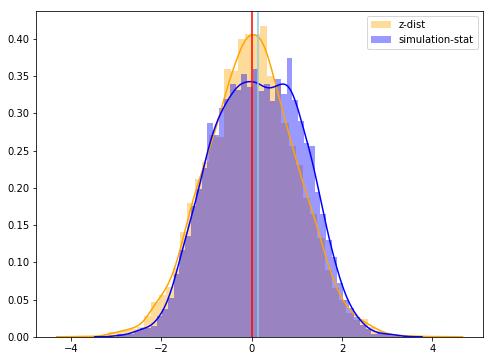

In [657]:
plt.figure(figsize = (8,6))

sns.distplot( s1 , bins = 50, color='orange', label = 'z-dist')
sns.distplot(t_stat, bins = 50, color = 'blue', label= 'simulation-stat')


plt.axvline(x=0, color = 'red')
plt.axvline(x=np.array(t_stat).mean(), color = 'skyblue')

plt.legend()
plt.show()
plt.close()

In [658]:
# A가 더 큰 통계량 개수 - 5512개(10000개 중)
sum(np.array(t_stat)>0)/10000

0.5512

---

In [659]:
## 총액 관점
diff = []
for i in range(len(sub_a_)):
    diff.append( np.array(sub_a_[i]).sum() - np.array(sub_b_[i]).sum() )

print( sum( np.array(diff) > 0 ) / 10000 ) # 총액 관점에서, #(sum(A) > sum(B)) - 4842개
print( np.array(diff).mean() )         # 총액 관점에서, mean(sum(A)-sum(B)) - (-)78304원

0.4891
100124.0913


---

### # 3.1.1-(2) ARPPU (CM)

In [660]:
ss = 0
t_stat = []

for i in range(len(sub_a_cm_)):
    # equal variance test
    #var_test = stats.levene(sub_a_notgc[i], sub_b_notgc[i]) # 동분산이라고 가정하고
    
    test_result = stats.ttest_ind(sub_a_cm_[i], sub_b_cm_[i], equal_var=True)
    t_stat.append(test_result[0])
    if test_result[1] < 0.1 : 
        ss += 1

In [661]:
1-ss/10000

0.9087

- 우리가 얻은 통계량과, 표준정규분포와 비교(t분포지만, sample size 크기때문에 수렴!)

In [662]:
s1 = np.random.normal(0, 1, 10000)

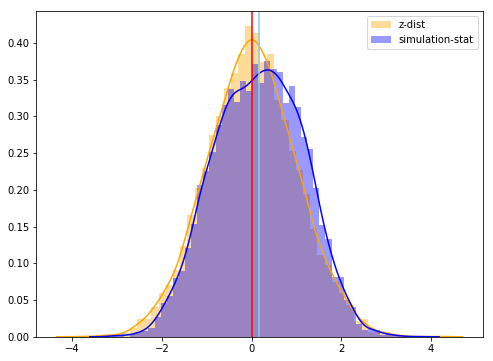

In [663]:
plt.figure(figsize = (8,6))

sns.distplot( s1 , bins = 50, color='orange', label = 'z-dist')
sns.distplot(t_stat, bins = 50, color = 'blue', label= 'simulation-stat')


plt.axvline(x=0, color = 'red')
plt.axvline(x=np.array(t_stat).mean(), color = 'skyblue')

plt.legend()
plt.show()
plt.close()

In [664]:
# A가 더 큰 통계량 개수 - 5710개(10000개 중)
sum(np.array(t_stat)>0)/10000

0.5648

---

In [665]:
## 총액 관점
diff = []
for i in range(len(sub_a_cm_)):
    diff.append( np.array(sub_a_cm_[i]).sum() - np.array(sub_b_cm_[i]).sum() )

print( sum( np.array(diff) > 0 ) / 10000 ) # 총액 관점에서, #(sum(A) > sum(B)) - 5483개
print( np.array(diff).mean() )         # 총액 관점에서, mean(sum(A)-sum(B)) - 74779원

0.5396
66895.6056


----

# 3.1.2 전체 관점 - A / C

### # 3.1.2-(1) ARPU : Total user's average GMV

In [666]:
ss = 0
t_stat = []

for i in range(len(sub_a_)):
    # equal variance test
    #var_test = stats.levene(sub_a_notgc[i], sub_b_notgc[i]) # 동분산이라고 가정하고
    
    t1 = np.append(np.zeros(10000-len(sub_a_[i])), np.array( sub_a_[i] ))
    t2 = np.append(np.zeros(10000-len(sub_c_[i])), np.array( sub_c_[i] ))
    
    test_result = stats.ttest_ind( t1, t2, equal_var=True)
    t_stat.append(test_result[0])
    if test_result[1] < 0.1 : 
        ss += 1

In [667]:
1-ss/10000

0.9132

- 우리가 얻은 통계량과, 표준정규분포와 비교(t분포지만, sample size 크기때문에 수렴!)

In [668]:
s1 = np.random.normal(0, 1, 10000)

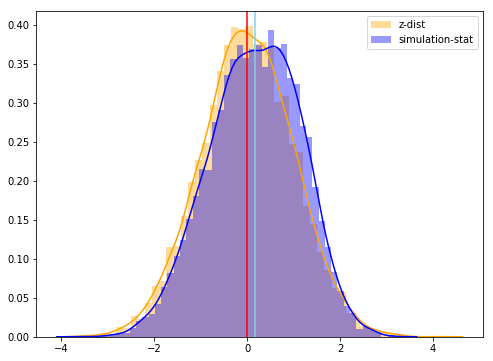

In [669]:
plt.figure(figsize = (8,6))

sns.distplot( s1 , bins=50, color='orange', label = 'z-dist')
sns.distplot(t_stat, bins=50, color = 'blue', label= 'simulation-stat')


plt.axvline(x=0, color = 'red')
plt.axvline(x=np.array(t_stat).mean(), color = 'skyblue')

plt.legend()
plt.show()
plt.close()

In [670]:
# A가 더 큰 통계량 개수 - 5800개(10000개 중)
sum(np.array(t_stat)>0)/10000

0.5736

---

### # 3.1.2-(1) ARPU (CM 관점)

In [671]:
ss = 0
t_stat = []

for i in range(len(sub_a_cm_)):
    # equal variance test
    #var_test = stats.levene(sub_a_notgc[i], sub_b_notgc[i]) # 동분산이라고 가정하고
    
    t1 = np.append(np.zeros(10000-len(sub_a_cm_[i])), np.array( sub_a_cm_[i] ))
    t2 = np.append(np.zeros(10000-len(sub_c_cm_[i])), np.array( sub_c_cm_[i] ))
    
    test_result = stats.ttest_ind( t1, t2, equal_var=True)
    t_stat.append(test_result[0])
    if test_result[1] < 0.1 : 
        ss += 1

In [672]:
1-ss/10000

0.9011

- 우리가 얻은 통계량과, 표준정규분포와 비교(t분포지만, sample size 크기때문에 수렴!)

In [673]:
s1 = np.random.normal(0, 1, 10000)

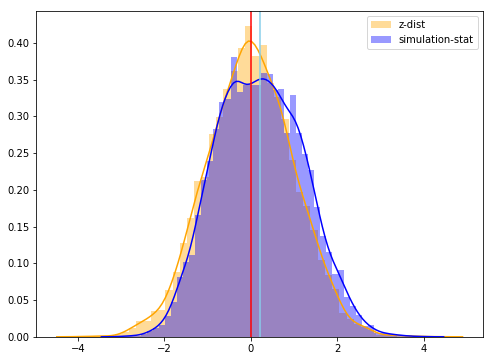

In [674]:
plt.figure(figsize = (8,6))

sns.distplot( s1 , bins = 50, color='orange', label = 'z-dist')
sns.distplot(t_stat, bins = 50, color = 'blue', label= 'simulation-stat')


plt.axvline(x=0, color = 'red')
plt.axvline(x=np.array(t_stat).mean(), color = 'skyblue')

plt.legend()
plt.show()
plt.close()

In [675]:
# A가 더 큰 통계량 개수 - 5690개(10000개 중)
sum(np.array(t_stat)>0)/10000

0.5654

---

### # 3.1.2-(2) ARPPU

In [676]:
ss = 0
t_stat = []

for i in range(len(sub_a_)):
    # equal variance test
    #var_test = stats.levene(sub_a_notgc[i], sub_b_notgc[i]) # 동분산이라고 가정하고
    
    test_result = stats.ttest_ind(sub_a_[i], sub_c_[i], equal_var=True)
    t_stat.append(test_result[0])
    if test_result[1] < 0.1 : 
        ss += 1

In [677]:
1-ss/10000

0.8903

In [678]:
np.array(t_stat).mean()

0.40426730116994225

- 우리가 얻은 통계량과, 표준정규분포와 비교(t분포지만, sample size 크기때문에 수렴!)

In [679]:
s1 = np.random.normal(0, 1, 10000)

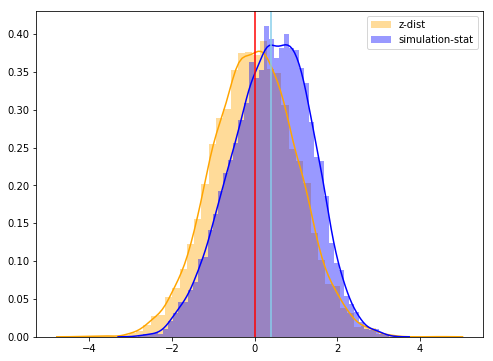

In [680]:
plt.figure(figsize = (8,6))

sns.distplot( s1 , bins=50, color='orange', label = 'z-dist')
sns.distplot(t_stat, bins=50, color = 'blue', label= 'simulation-stat')


plt.axvline(x=0, color = 'red')
plt.axvline(x=np.array(t_stat).mean(), color = 'skyblue')

plt.legend()
plt.show()
plt.close()

In [681]:
# A가 더 큰 통계량 개수 - 6663개(10000개 중)
sum(np.array(t_stat)>0) / 10000

0.6662

---

In [682]:
## 총액 관점
diff = []
for i in range(len(sub_a_)):
    diff.append( np.array(sub_a_[i]).sum() - np.array(sub_c_[i]).sum() )  # 10000명의 총매출 차이

print( sum( np.array(diff) > 0 ) / 10000 ) # 총액 관점에서, #(sum(A) > sum(B)) - 5800
print( np.array(diff).mean() )         # 총액 관점에서, mean(sum(A)-sum(B))  - 2,080,458

0.5736
2146387.8909


---

### # 3.1.1-(2) ARPPU (CM)

In [683]:
ss = 0
t_stat = []

for i in range(len(sub_a_cm_)):
    # equal variance test
    #var_test = stats.levene(sub_a_notgc[i], sub_b_notgc[i]) # 동분산이라고 가정하고
    
    test_result = stats.ttest_ind(sub_a_cm_[i], sub_c_cm_[i], equal_var=True)
    t_stat.append(test_result[0])
    if test_result[1] < 0.1 : 
        ss += 1

In [684]:
1-ss/10000

0.8931

- 우리가 얻은 통계량과, 표준정규분포와 비교(t분포지만, sample size 크기때문에 수렴!)

In [685]:
s1 = np.random.normal(0, 1, 10000)

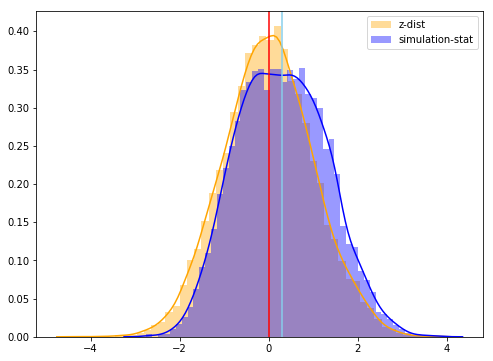

In [686]:
plt.figure(figsize = (8,6))

sns.distplot( s1 , bins = 50, color='orange', label = 'z-dist')
sns.distplot(t_stat, bins = 50, color = 'blue', label= 'simulation-stat')


plt.axvline(x=0, color = 'red')
plt.axvline(x=np.array(t_stat).mean(), color = 'skyblue')

plt.legend()
plt.show()
plt.close()

In [687]:
# A가 더 큰 통계량 개수 - 6012개(10000개 중)
sum(np.array(t_stat)>0)/10000

0.5944

---

In [688]:
## 총액 관점
diff = []
for i in range(len(sub_a_cm_)):
    diff.append( np.array(sub_a_cm_[i]).sum() - np.array(sub_c_cm_[i]).sum() )

print( sum( np.array(diff) > 0 ) / 10000 ) # 총액 관점에서, #(sum(A) > sum(B)) - 5690
print( np.array(diff).mean() )         # 총액 관점에서, mean(sum(A)-sum(B)) - 84,173원

0.5654
81427.4509


---